In [50]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('yt8m_similar/003mEslZvugQCc9.wav')
if len(samples.shape)==2:
    samples = samples.astype(float)
    samples = samples.sum(axis=1) / 2
    
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
print(frequencies.shape)
print(times.shape)
print(spectrogram.shape)

(129,)
(196,)
(129, 196)


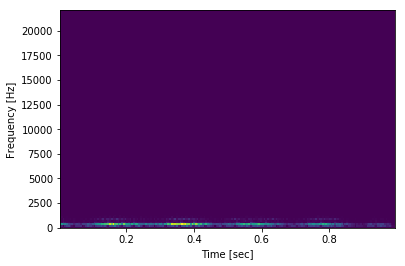

In [51]:
plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

/home/roxor/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


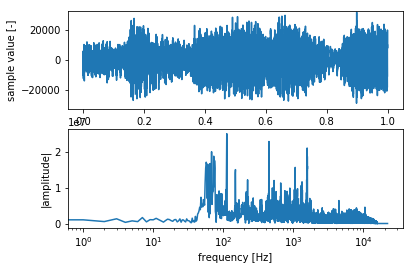

In [72]:
#for stereo
import wave
import numpy as np

wr = wave.open('yt8m_similar/002yVwt49os4F06.wav', 'r')
sz = 44100 # Read and process 1 second at a time.
da = np.fromstring(wr.readframes(sz), dtype=np.int16)
left, right = da[0::2], da[1::2]
lf, rf = abs(np.fft.rfft(left)), abs(np.fft.rfft(right))
import matplotlib.pyplot as plt

plt.figure(1)
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(44100)/44100
plt.plot(x, left)
b = plt.subplot(212)
b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(lf)

/home/roxor/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


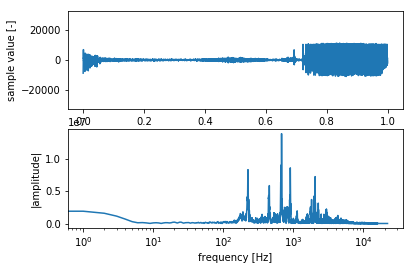

In [73]:
#for stereo
import wave
import numpy as np

wr = wave.open('yt8m_least_similar/001OYkZxbD0vr81.wav', 'r')
sz = 44100 # Read and process 1 second at a time.
da = np.fromstring(wr.readframes(sz), dtype=np.int16)
left, right = da[0::2], da[1::2]
lf, rf = abs(np.fft.rfft(left)), abs(np.fft.rfft(right))
import matplotlib.pyplot as plt

plt.figure(1)
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(44100)/44100
plt.plot(x, left)
b = plt.subplot(212)
b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(lf)

/home/roxor/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':
/home/roxor/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


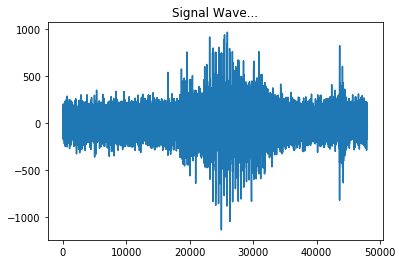

In [70]:
#for mono
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open('yt8m_similar/004j2JoL0Bmx4M7.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')


#If Stereo
if spf.getnchannels() == 2:
    print('Just mono files')
    sys.exit(0)

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()

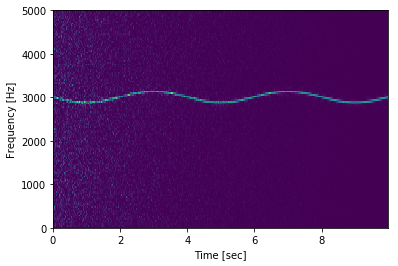

In [48]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()